In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample
import plotly.express as px
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score
import time

In [36]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [127]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
print(data.shape)

(10000, 14)


In [38]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data.columns.values.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [39]:
red_data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [40]:
red_data.columns.values.tolist()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [41]:
categorical_features = red_data.select_dtypes(include = ['object']).columns.tolist()
numerical_features = red_data.select_dtypes(exclude = ['object']).columns.tolist()
print("Categorical Features: ", categorical_features)
print("Numerical Features: ", numerical_features)

Categorical Features:  ['Geography', 'Gender']
Numerical Features:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


DEPENDENT VARIABLE

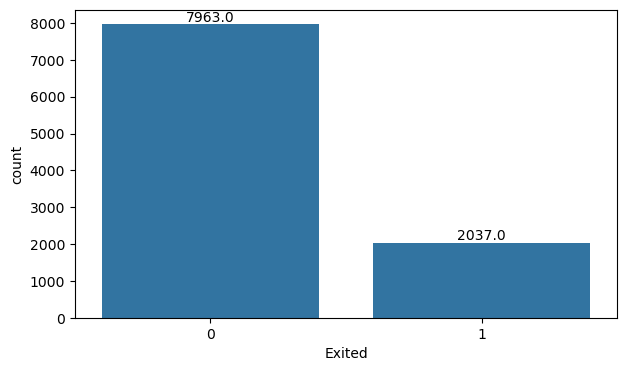

In [42]:
plt.figure(figsize = (7, 4))
ax = sns.countplot(x = "Exited", data = red_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.show()

In [ ]:
DESCRIPTIVE ANALYSIS

In [16]:
pd.crosstab(red_data.Gender, red_data.Exited)

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [17]:
aa = pd.crosstab(red_data.Gender, red_data.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    print(f"The probability of {i.lower()} customer churning is approximately", round(aa.loc[i].values[1]/s, 3))

The probability of female customer churning is approximately 0.251
The probability of male customer churning is approximately 0.165


In [18]:
pd.crosstab(red_data.Geography, red_data.Exited)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [19]:
aa = pd.crosstab(red_data.Geography, red_data.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    print(f"The probability of residents of {i} churning is approximately", round(aa.loc[i].values[1]/s, 3))

The probability of residents of France churning is approximately 0.162
The probability of residents of Germany churning is approximately 0.324
The probability of residents of Spain churning is approximately 0.167


In [20]:
pd.crosstab(red_data.IsActiveMember, red_data.Exited)

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [21]:
aa = pd.crosstab(red_data.IsActiveMember, red_data.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    if i == 0:
        j = 'non-active'
    else:
        j = 'active'
    print(f"The probability of {j} users to churn is approximately", round(aa.loc[i].values[1]/s, 3))

The probability of non-active users to churn is approximately 0.269
The probability of active users to churn is approximately 0.143


In [22]:
pd.crosstab(red_data.NumOfProducts, red_data.Exited)

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [23]:
aa = pd.crosstab(red_data.NumOfProducts, red_data.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    print(f"The probability of customers churning with {i} product(s) is approximately", round(aa.loc[i].values[1]/s, 3))

The probability of customers churning with 1 product(s) is approximately 0.277
The probability of customers churning with 2 product(s) is approximately 0.076
The probability of customers churning with 3 product(s) is approximately 0.827
The probability of customers churning with 4 product(s) is approximately 1.0


In [24]:
pd.crosstab(red_data.HasCrCard, red_data.Exited)

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [25]:
aa = pd.crosstab(red_data.HasCrCard, red_data.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    if i == 0:
        j = 'without'
    else:
        j = 'with'
    print(f"The probability of customers churning {j} credit card is approximately", round(aa.loc[i].values[1]/s, 3))

The probability of customers churning without credit card is approximately 0.208
The probability of customers churning with credit card is approximately 0.202


In [32]:
pd.crosstab(red_data.Tenure, red_data.Exited)

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


In [33]:
aa = pd.crosstab(red_data.Tenure, red_data.Exited)
for i in aa.index:
    s = sum(aa.loc[i].values)
    print(f"The probability of customers churning who has been associated with bank for {i} years", round(aa.loc[i].values[1]/s, 3))

The probability of customers churning who has been associated with bank for 0 years 0.23
The probability of customers churning who has been associated with bank for 1 years 0.224
The probability of customers churning who has been associated with bank for 2 years 0.192
The probability of customers churning who has been associated with bank for 3 years 0.211
The probability of customers churning who has been associated with bank for 4 years 0.205
The probability of customers churning who has been associated with bank for 5 years 0.207
The probability of customers churning who has been associated with bank for 6 years 0.203
The probability of customers churning who has been associated with bank for 7 years 0.172
The probability of customers churning who has been associated with bank for 8 years 0.192
The probability of customers churning who has been associated with bank for 9 years 0.216
The probability of customers churning who has been associated with bank for 10 years 0.206


EDA

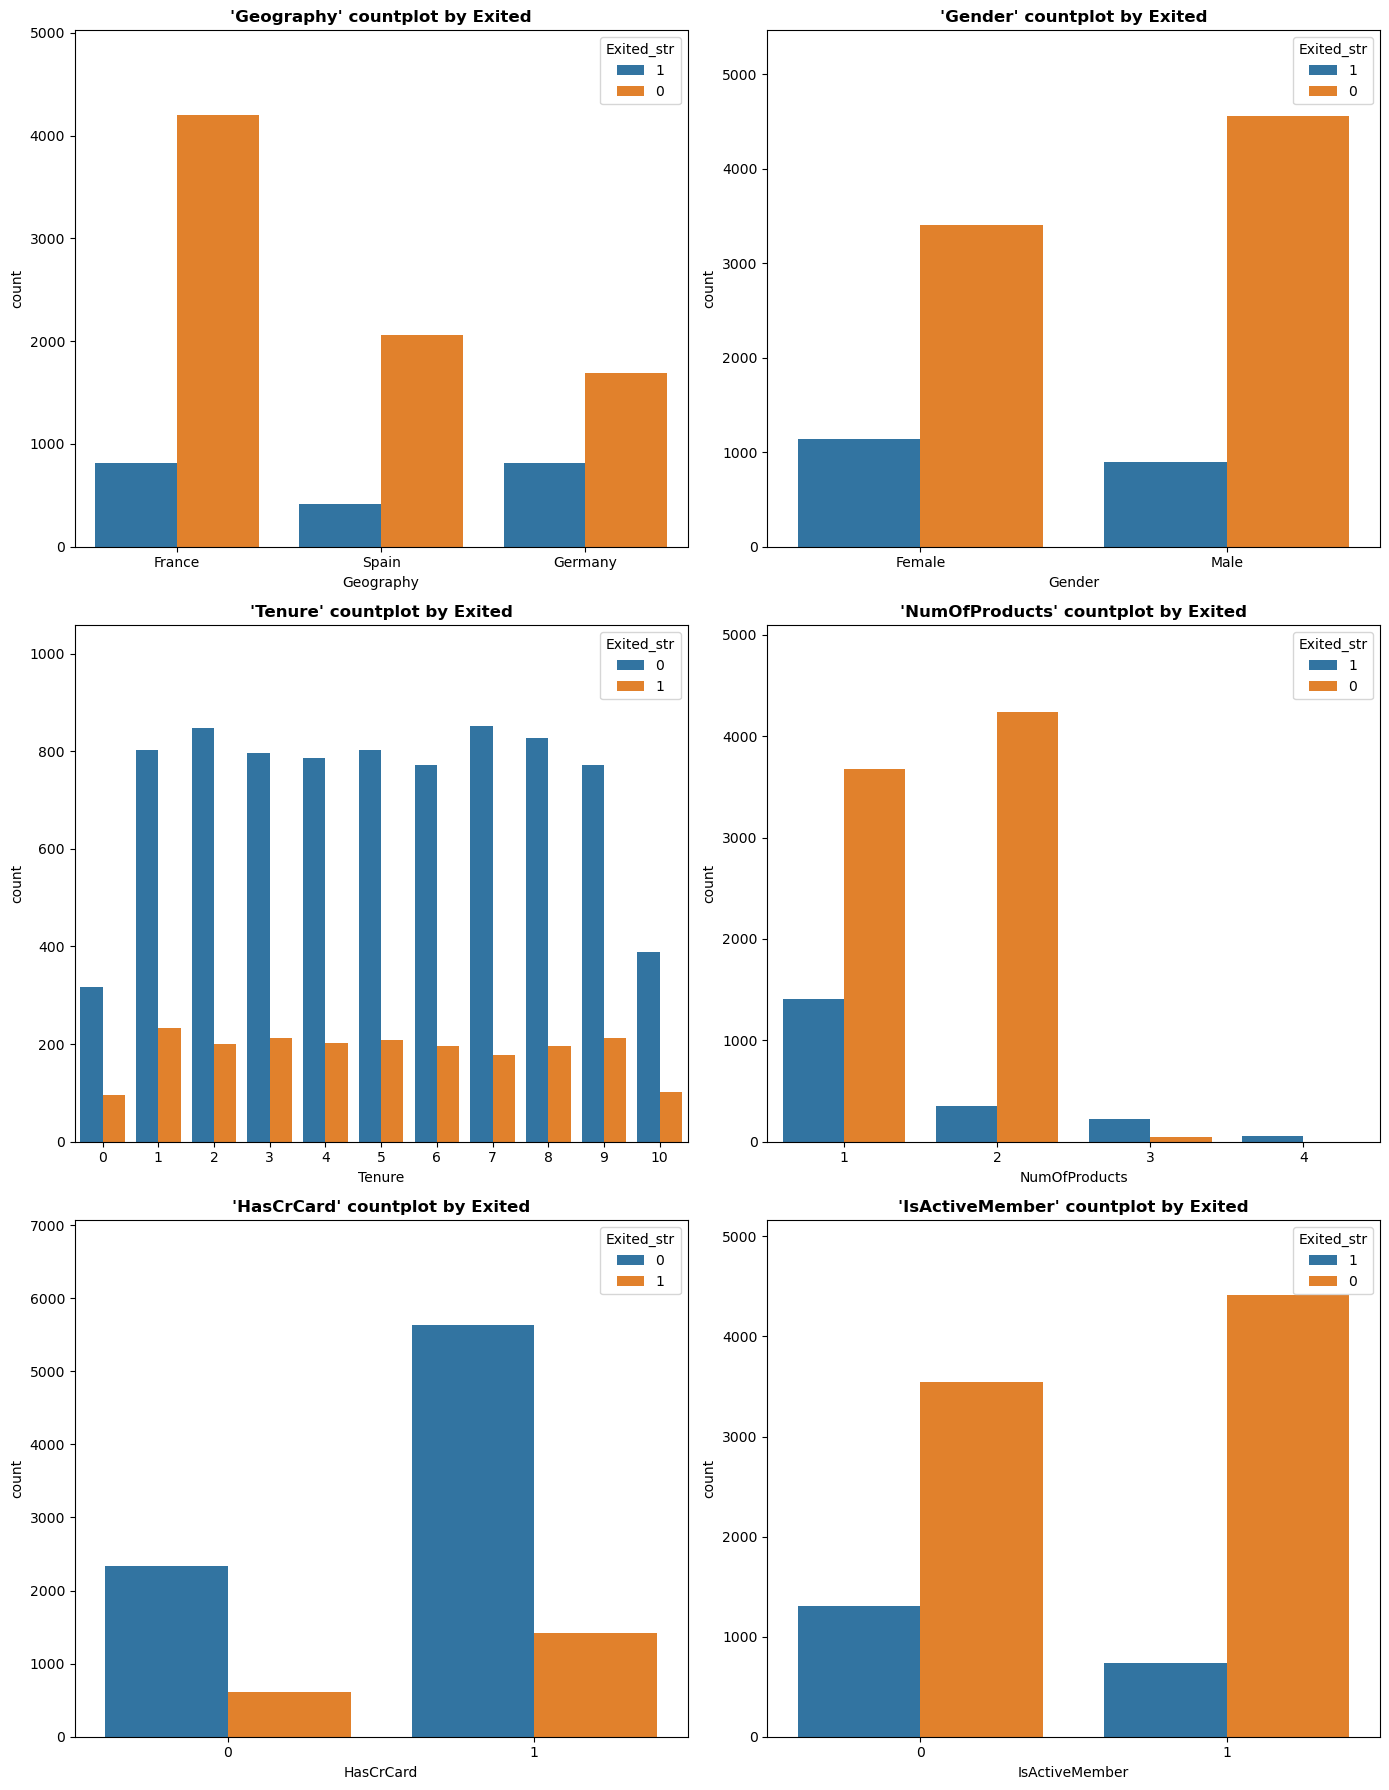

In [31]:
red_data['Exited_str']=red_data.Exited.apply(str)
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig = plt.figure(figsize=(14, len(cat_cols)*3))

for i, col in enumerate(cat_cols): 
    plt.subplot(len(cat_cols)//2 + len(cat_cols) % 2, 2, i+1)
    sns.countplot(x=col, hue='Exited_str', data=red_data)
    plt.title(f"'{col}' countplot by Exited", fontweight = 'bold')
    plt.ylim(0, red_data[col].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

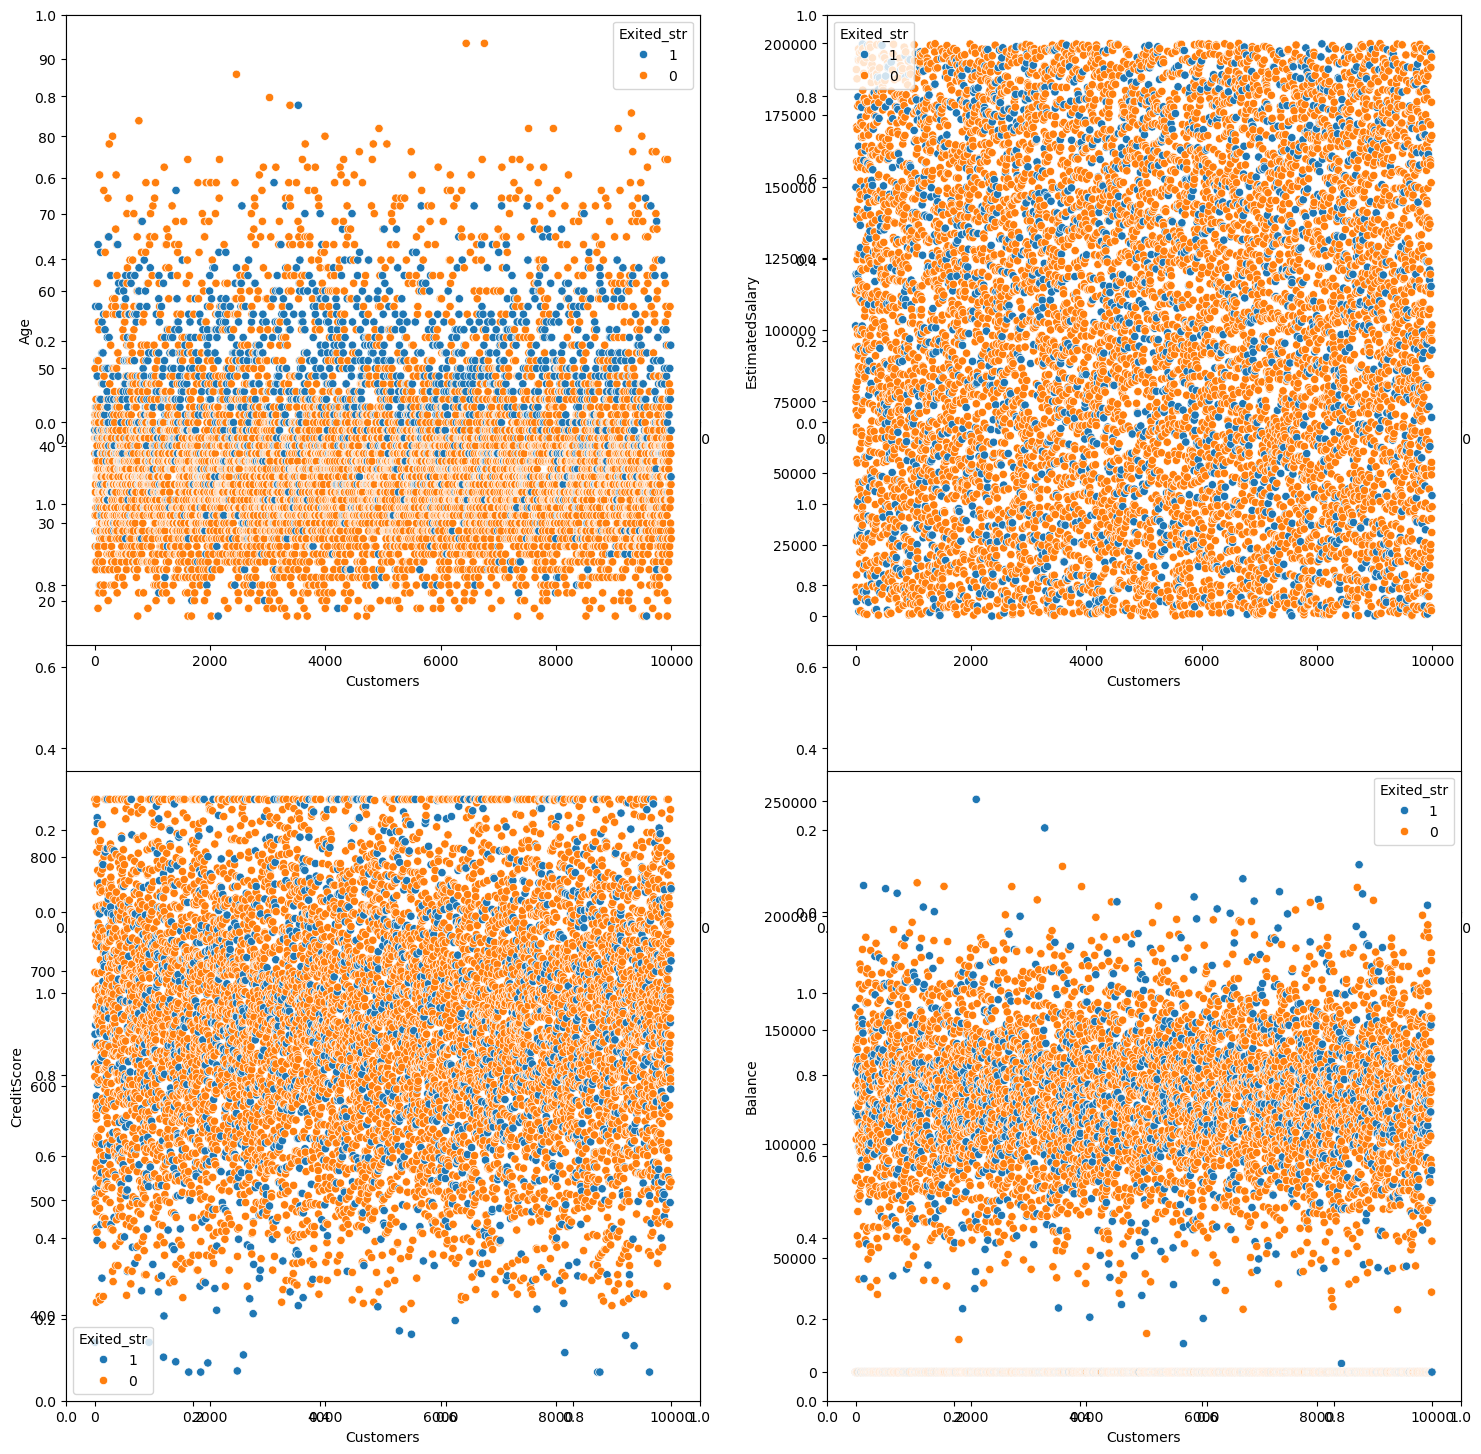

In [40]:
red_data['Exited_str']=red_data.Exited.apply(str)
fig, axis = plt.subplots(3, 2, figsize=(18, 18))
req = ['Age', 'EstimatedSalary', 'CreditScore', 'Balance']
for i, j in enumerate(req, start=1):
    ax = plt.subplot(2, 2, i)
    sns.scatterplot(y = j, x = red_data.index, data = red_data, hue = 'Exited_str', ax=ax)
    ax.set_xlabel("Customers")
plt.show()

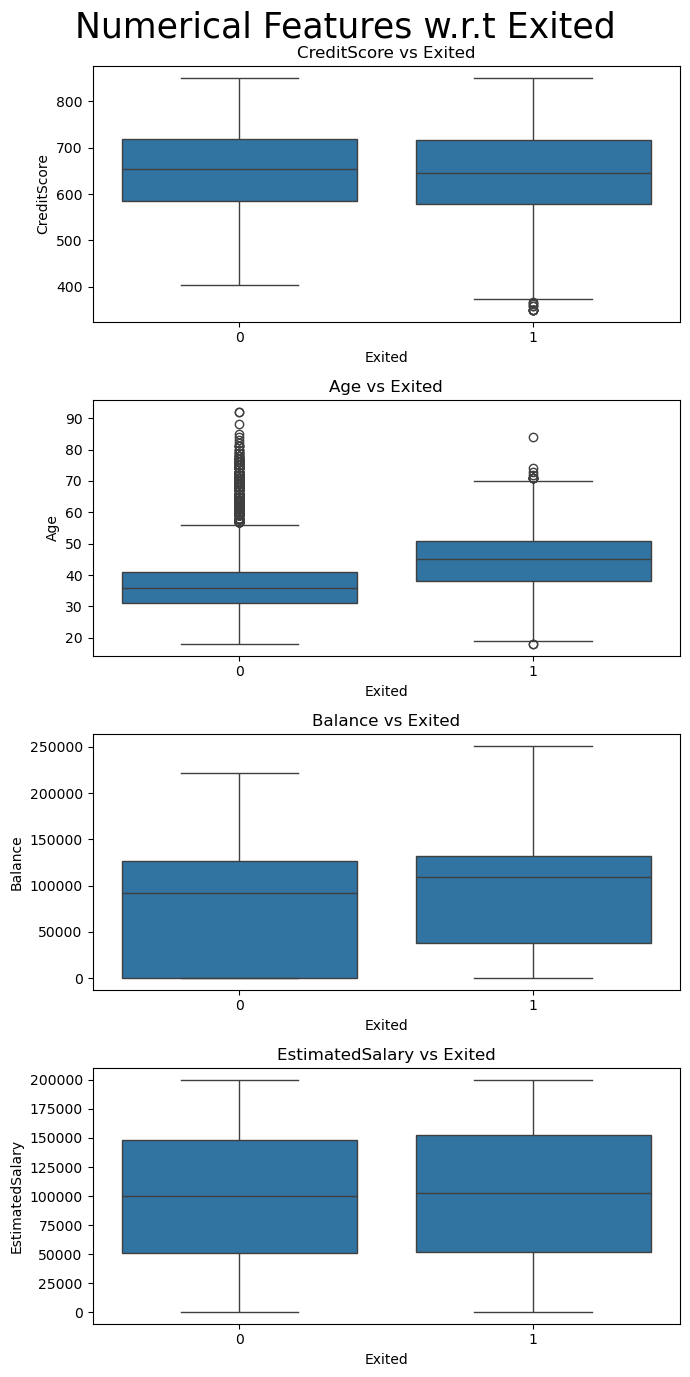

In [59]:
numerical_features2 = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
fig, axes = plt.subplots(nrows = 4, ncols = 1,figsize = (7,14))
for i, j in enumerate(numerical_features2):
    ax = sns.boxplot(x = 'Exited',y = j, data = red_data, ax = axes[i])
    title = j + ' vs Exited'
    axes[i].set_title(title)
fig.suptitle('Numerical Features w.r.t Exited', fontsize = 25)
plt.tight_layout()
plt.show()

<Axes: xlabel='Exited', ylabel='Age'>

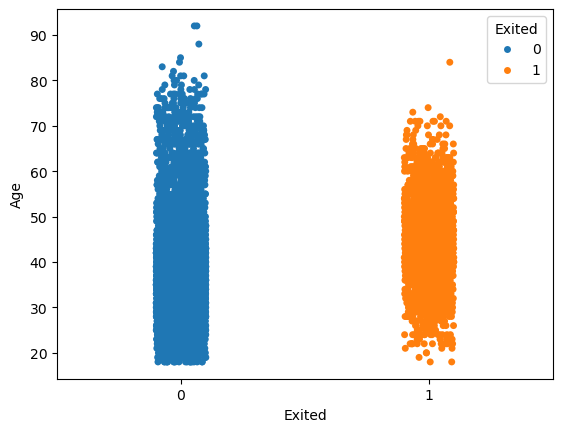

In [51]:
sns.stripplot(x=red_data['Exited'], y=red_data['Age'], hue=red_data['Exited'])

<Axes: xlabel='Exited', ylabel='Balance'>

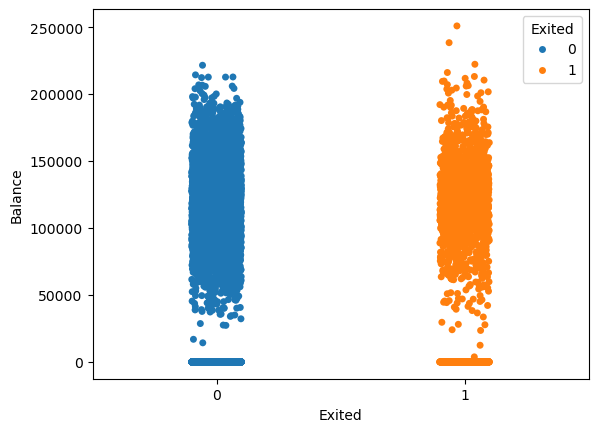

In [60]:
sns.stripplot(x=red_data['Exited'], y=red_data['Balance'], hue=red_data['Exited'])

<Axes: xlabel='Exited', ylabel='CreditScore'>

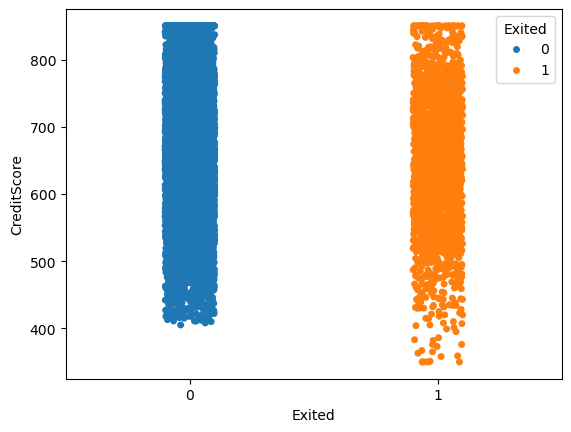

In [61]:
sns.stripplot(x=red_data['Exited'], y=red_data['CreditScore'], hue=red_data['Exited'])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

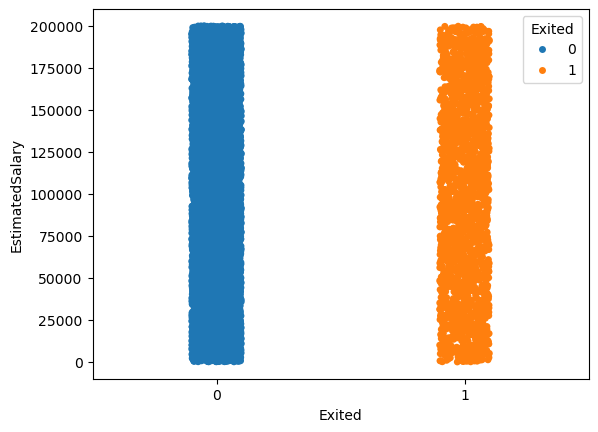

In [62]:
sns.stripplot(x=red_data['Exited'], y=red_data['EstimatedSalary'], hue=red_data['Exited'])

DATA DISTRIBUTION

<Axes: xlabel='Age', ylabel='Count'>

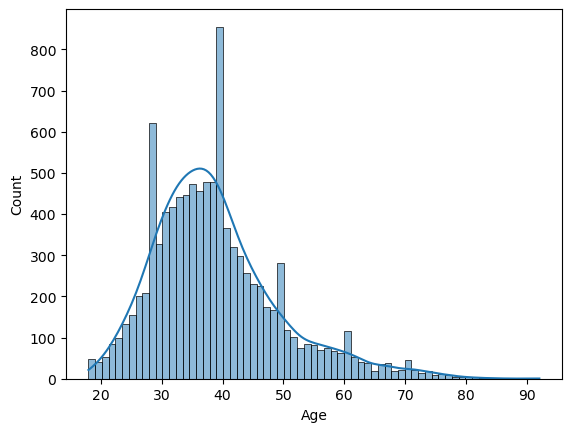

In [71]:
sns.histplot(red_data["Age"],kde=True)

<Axes: xlabel='CreditScore', ylabel='Count'>

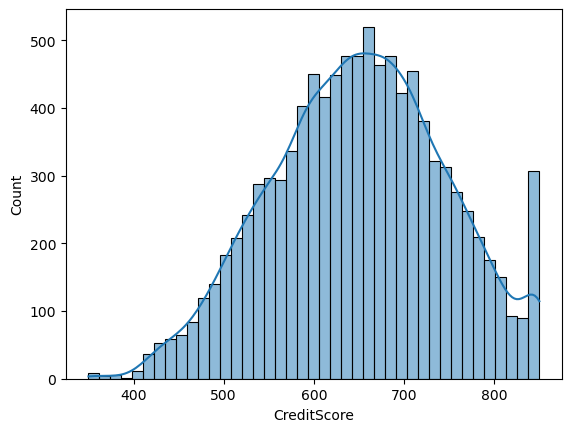

In [73]:
 sns.histplot(red_data["CreditScore"],kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

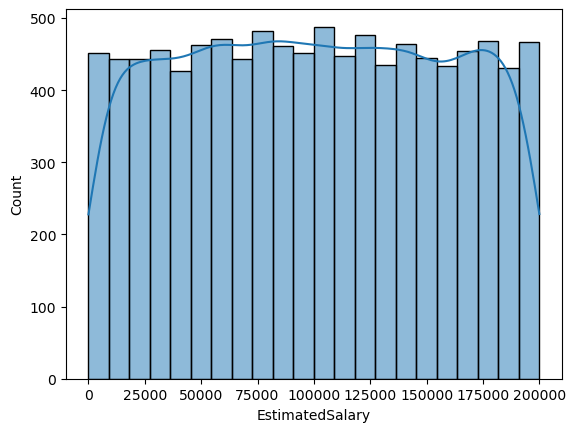

In [74]:
 sns.histplot(red_data["EstimatedSalary"],kde=True)

<Axes: xlabel='Balance', ylabel='Count'>

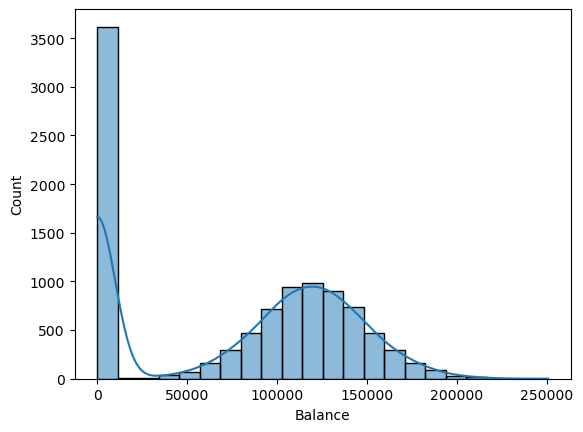

In [68]:
 sns.histplot(red_data["Balance"],kde=True)

In [76]:
red_data[numerical_features2].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [ ]:
Implication:
CreditScore, Balance and EstimatedSalary are fairly symmetrical
Age is skewed

In [28]:
cor=red_data[numerical_features].corr().round(2)
cor

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


<Axes: >

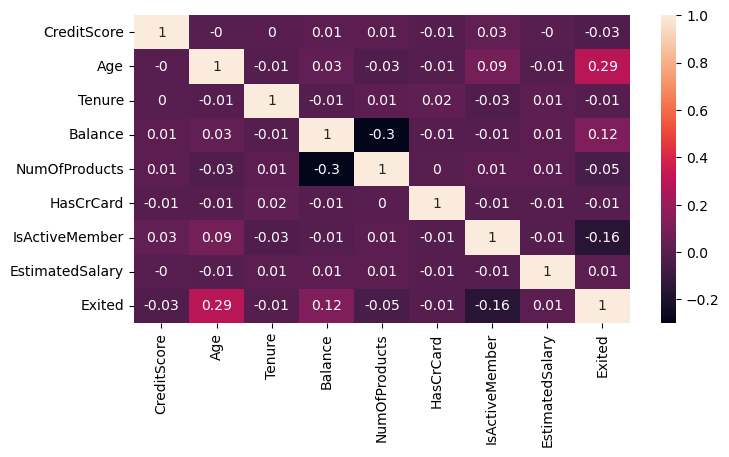

In [78]:
plt.figure(figsize = (8, 4))
sns.heatmap(data=cor,annot=True, cmap='rocket')

Categorical Feature Encoding

In [6]:
#red_data.Geography = red_data.Geography.map({'France': 0, 'Germany': 1, 'Spain': 2})
#red_data.Gender = red_data.Gender.map({'Female': 0, 'Male': 1})

In [6]:
# temp_dict2 = {'Male': 0, 'Female': 1}
# red_data['Gender'] = data.Gender.map(temp_dict2)

In [7]:
# temp_dict1 = {'France': 0, 'Germany': 1, 'Spain':2}
# red_data['Geography'] = data.Geography.map(temp_dict1)

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

red_data['Geography'] = label_encoder.fit_transform(red_data['Geography'])

red_data['Gender'] = label_encoder.fit_transform(red_data['Gender'])

red_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


HANDLING IMBALANCED DATASET

In [44]:
majority_class_data = red_data[red_data.Exited == 0]
minority_class_data = red_data[red_data.Exited == 1]
upsampled_minority_class = resample(minority_class_data, replace=True, n_samples=len(majority_class_data))
red_data = pd.concat([majority_class_data, upsampled_minority_class], axis=0)
print(red_data.Exited.value_counts())
red_data.shape

Exited
0    7963
1    7963
Name: count, dtype: int64


(15926, 11)

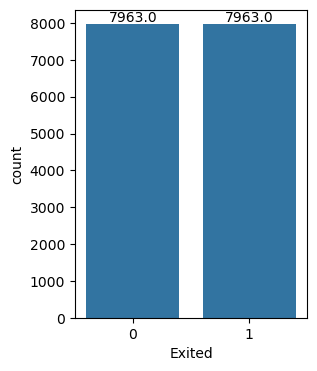

In [45]:
plt.figure(figsize = (3, 4))
ax = sns.countplot(x = "Exited", data = red_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.show()

In [10]:
print(red_data.shape)

(15926, 11)


DATA SPLIT

In [46]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [47]:
x=red_data.drop('Exited',axis=1)
y=red_data['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
cv = StratifiedKFold(n_splits = 8, shuffle = True)

MODELLING

In [48]:
def train_model_with_random_search(model, param_grid, x_train, y_train, x_test, y_test, skf):
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, 
                                       scoring='accuracy', n_jobs=-1, cv=skf)
    
    # Fit RandomizedSearchCV
    random_search.fit(x_train, y_train)
    # Get best estimator
    best_model = random_search.best_estimator_
    # Get best param
    best_param = random_search.best_params_
    # Predict on test set
    y_pred = best_model.predict(x_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)

    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)
    print('AUC(ROC): ', roc_auc)
    print()
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))
    
    ## ROC AUC
    prob = best_model.predict_proba(x_test)  
    prob = prob[:, 1]
    fper, tper, _ = roc_curve(y_test, prob)
    auc_scr = auc(fper, tper)

    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    axes[0].plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_scr)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc="lower right")
    
    sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1], annot = True, cbar = False, fmt='.0f')
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')
    
    plt.show()

    # Return evaluation metrics
    return best_model, accuracy, f1, roc_auc, best_param

DECISION TREE

Accuracy:  0.9014231896190875
F1 Score:  0.9010092110118525
AUC(ROC):  0.9014776119847556

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2391
           1       0.86      0.97      0.91      2387

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



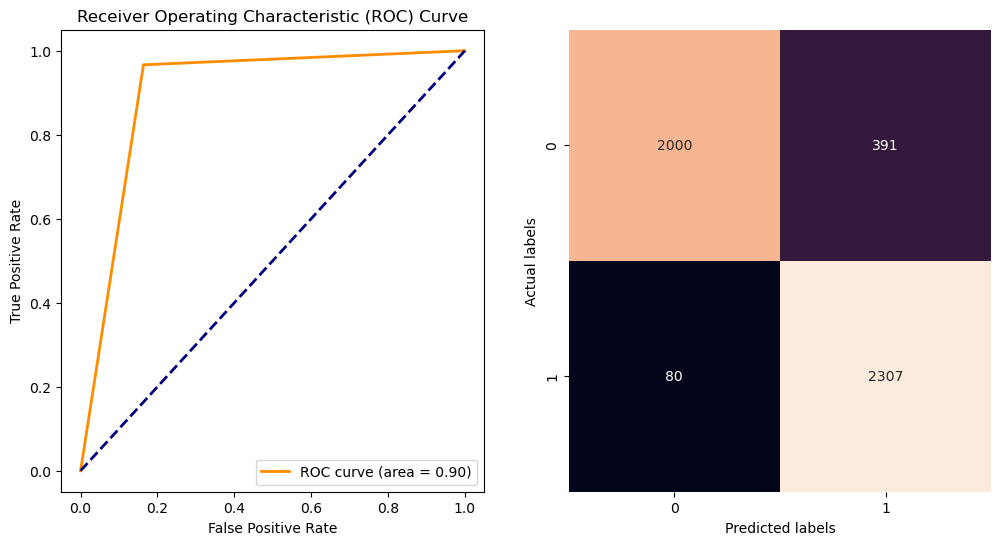

In [49]:
dt_param_grid = {
 'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model_dt = DecisionTreeClassifier()

time_start = time.time()
model_dt, acc_dt, f1_dt, roc_auc_dt, param_dt = train_model_with_random_search(model_dt, dt_param_grid, 
                                                                    x_train, y_train, x_test, y_test, cv)
time_taken_dt = time.time() - time_start

In [50]:
print('Best Parameters: ', param_dt)
print("Time Taken: ", round(time_taken_dt, 2), ' Seconds')


Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Time Taken:  1.23  Seconds


RANDOM FOREST

In [51]:
from sklearn.ensemble import RandomForestClassifier

Accuracy:  0.9449560485558811
F1 Score:  0.944936084858441
AUC(ROC):  0.9449723048500722

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2391
           1       0.93      0.96      0.95      2387

    accuracy                           0.94      4778
   macro avg       0.95      0.94      0.94      4778
weighted avg       0.95      0.94      0.94      4778



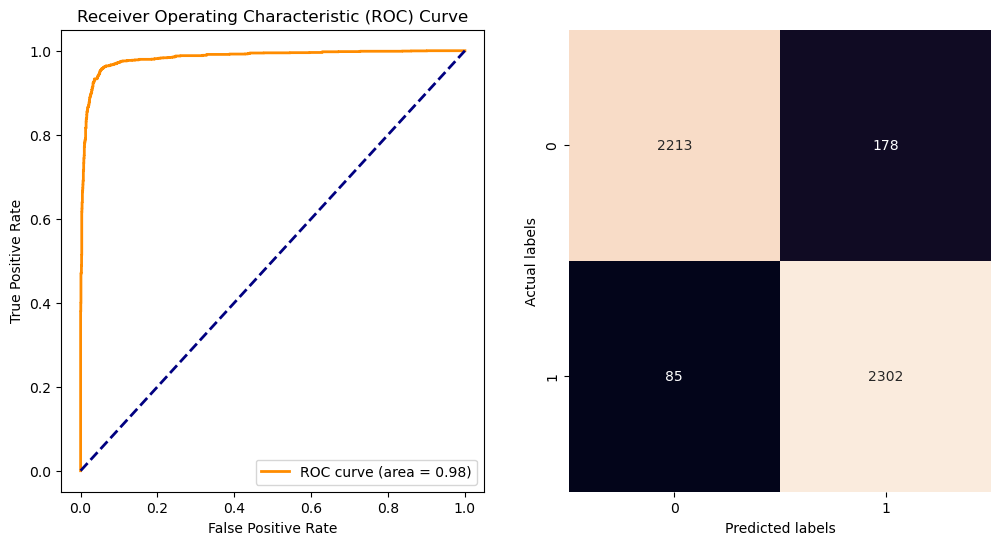

In [52]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model_rf = RandomForestClassifier()

time_start = time.time()
model_rf, acc_rf, f1_rf, roc_auc_rf, param_rf = train_model_with_random_search(model_rf, rf_param_grid, 
                                                                    x_train, y_train, x_test, y_test, cv)
time_taken_rf = time.time() - time_start

In [53]:
print('Best Parameters: ', param_rf)
print("Time Taken: ", round(time_taken_rf, 2), ' Seconds')

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}
Time Taken:  43.83  Seconds


XGBoost

In [19]:
!pip install xgboost

In [54]:
import xgboost as xgb

Accuracy:  0.9175387191293428
F1 Score:  0.9174215394413456
AUC(ROC):  0.9175705502252635

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2391
           1       0.89      0.96      0.92      2387

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



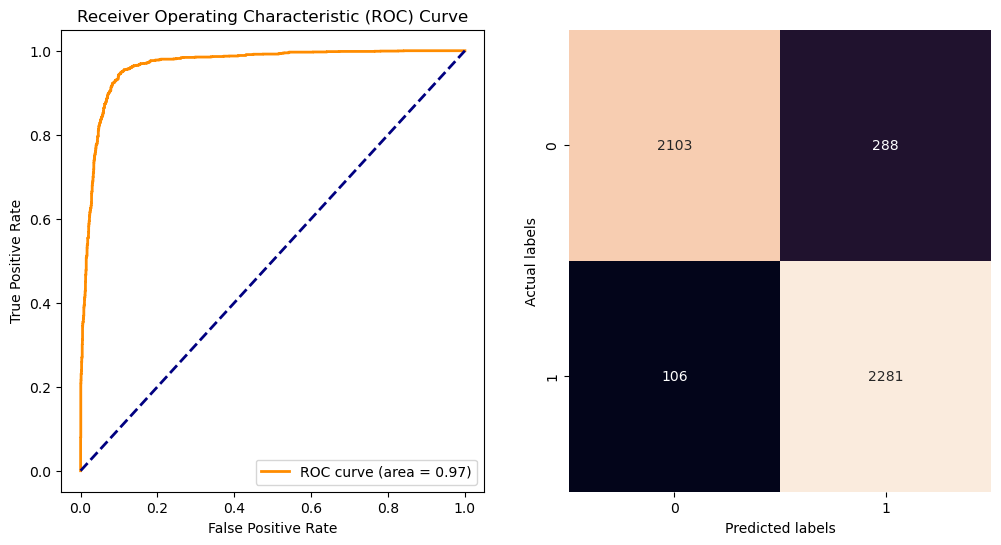

In [55]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 1, 5]
}



model_xgb = xgb.XGBClassifier()

time_start = time.time()
model_xgb, acc_xgb, f1_xgb, roc_auc_xgb, param_xgb = train_model_with_random_search(model_xgb, xgb_param_grid, 
                                                                        x_train, y_train, x_test, y_test, cv)
time_taken_xgb = time.time() - time_start

GaussianNB

In [56]:
from sklearn.naive_bayes import GaussianNB

C:\Users\tarni\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy:  0.7030138133110088
F1 Score:  0.7027622993994754
AUC(ROC):  0.702989600893029

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2391
           1       0.72      0.67      0.69      2387

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778



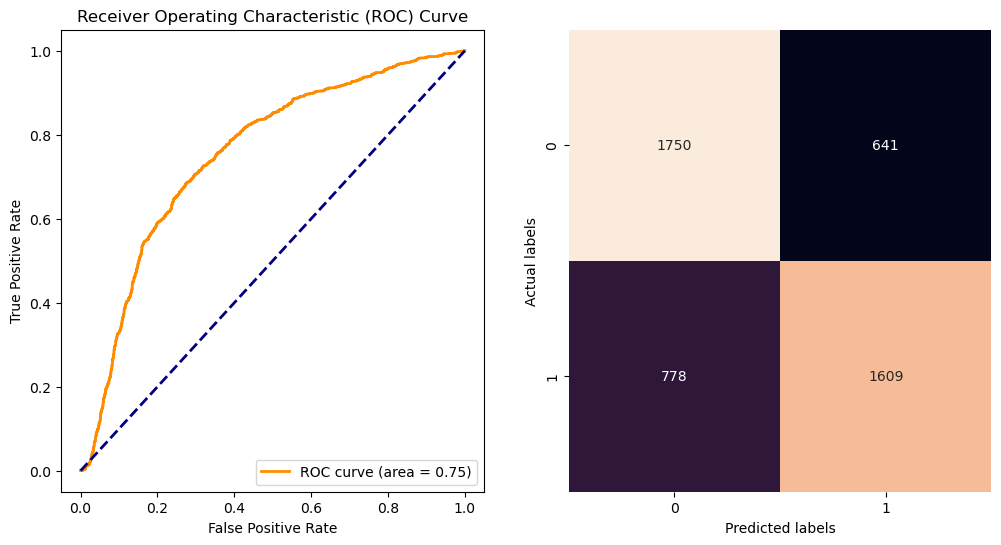

In [57]:
gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

model_gnb = GaussianNB()
time_start = time.time()
model_gnb, acc_gnb, f1_gnb, roc_auc_gnb, param_gnb = train_model_with_random_search(model_gnb, gnb_param_grid, 
                                                                         x_train, y_train, x_test, y_test, cv)
time_taken_gnb = time.time() - time_start

Logistic Regression

C:\Users\tarni\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tarni\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tarni\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

Accuracy:  0.7088740058601926
F1 Score:  0.7088482313641025
AUC(ROC):  0.708882036866009

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      2391
           1       0.70      0.72      0.71      2387

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



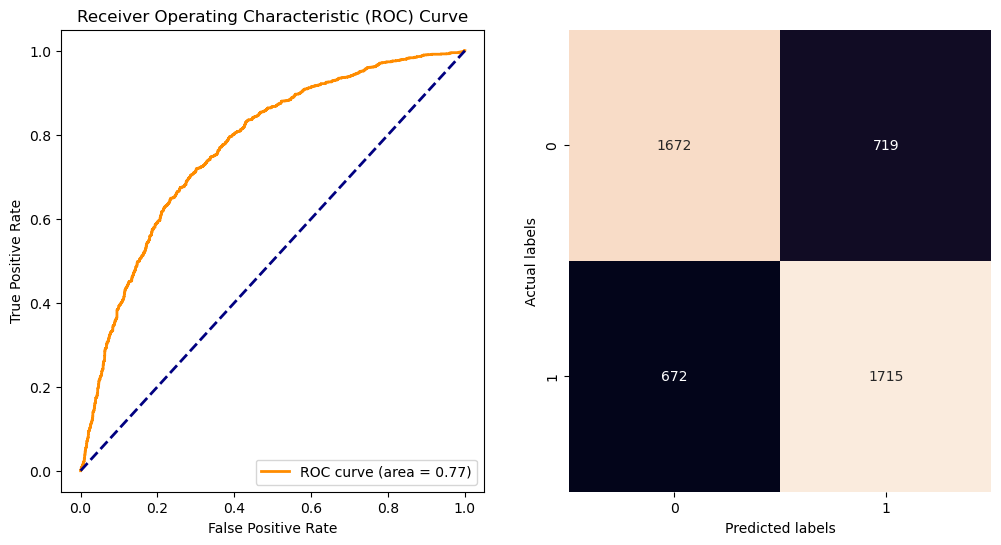

In [58]:
log_reg_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'liblinear'],
    'max_iter': [100, 200, 300, 400, 500]
}


model_lr = LogisticRegression()
time_start = time.time()
model_lr, acc_lr, f1_lr, roc_auc_lr, param_lr = train_model_with_random_search(model_lr, log_reg_param_grid, 
                                                                     x_train, y_train, x_test, y_test, cv)
time_taken_lr = time.time() - time_start

MODEL COMPARISON

In [59]:
accuracies = [acc_lr, acc_gnb, acc_dt, acc_rf, acc_xgb]
f_score = [f1_lr, f1_gnb, f1_dt, f1_rf, f1_xgb]
roc_auc = [roc_auc_lr, roc_auc_gnb, roc_auc_dt, roc_auc_rf, roc_auc_xgb]
time = [time_taken_lr, time_taken_gnb, time_taken_dt, time_taken_rf, time_taken_xgb]

final_df = pd.DataFrame({"Accuracies": accuracies, "F1 Scores": f_score, "ROC AUC": roc_auc, "Time Taken": time}, 
                       index = ['LogisticReg', 'GaussianNB', 'DecisionTree', 'RandomForest', 'XGB'])
final_df = final_df.round(4)
final_df

,Accuracies,F1 Scores,ROC AUC,Time Taken
LogisticReg,0.7089,0.7088,0.7089,1.3070
GaussianNB,0.7030,0.7028,0.7030,0.8251
DecisionTree,0.9014,0.9010,0.9015,1.2336
RandomForest,0.9450,0.9449,0.9450,43.8346
XGB,0.9175,0.9174,0.9176,4.6481


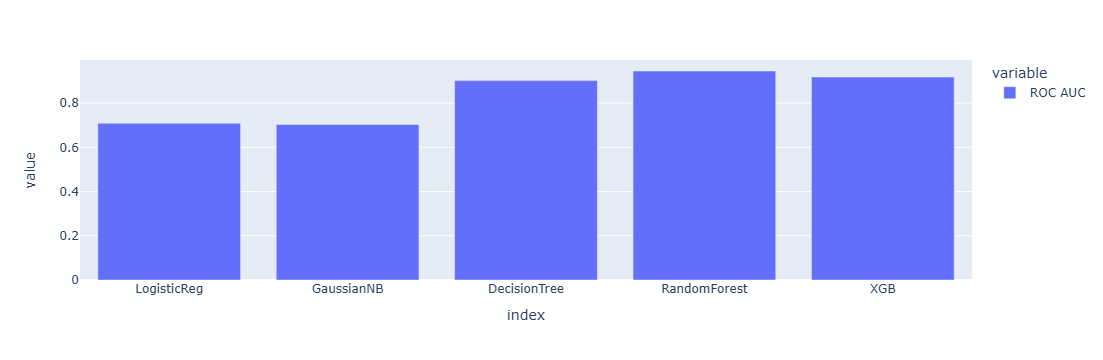

In [68]:
px.bar(final_df, x = final_df.index, y = ['ROC AUC'])